# Plotting the vertical depedency on p2

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import psutil
import datetime
import time as tm
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patheffects as pe
import xarray as xr
from matplotlib.colors import BoundaryNorm

In [2]:
#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


#expname = {
#      1: 'CTL',    
#      2: '4K',
#      3: '4K_qvCTL',
#      4: 'Tanom',
#      5: 'Tanom_TR',
#      6: 'Tanom_PO'
#         }

expname = {
      1: 'CTL',    
      2: 'T+4K',
      3: 'T+4K_RH-',
      4: 'T+anom',
      5: 'T+TRanom',
      6: 'T+POanom'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }


we load libraries

In [3]:
res='80km'
ipathPTE = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'

ntimes=37
nlevs=20
nexp=4

time2d   = np.full((ntimes,nlevs),np.nan,dtype=float)
level2d  = np.full((ntimes,nlevs),np.nan,dtype=int)

dfi   = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
itt   = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
tadv  = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
vmt   = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
diab  = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)

accdfi   = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
accitt   = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
acctadv  = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
accvmt   = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)
accdiab  = np.full((nexp,ntimes,nlevs),np.nan,dtype=float)

avgdfi   = np.full((nexp,nlevs),np.nan,dtype=float)
avgitt   = np.full((nexp,nlevs),np.nan,dtype=float)
avgtadv  = np.full((nexp,nlevs),np.nan,dtype=float)
avgvmt   = np.full((nexp,nlevs),np.nan,dtype=float)
avgdiab  = np.full((nexp,nlevs),np.nan,dtype=float)


levels = [50,70,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950]
levels_array = np.array(levels)
# read the data
for expno in [1,2,3,4]:
    if res == '80km':
        exp = exp80[expno]
    else:
        exp = exp2[expno]
    for k, lev in enumerate(levels):
        ifile1pte = 'PTE_for_'+exp+'_6hrly_1x1latlon_upper'+str(lev)+'hPa_box6.csv'
        pte    = pd.read_csv(ipathPTE+ifile1pte)
    
        time0      = pte['time'].to_numpy()
        dfi0       = pte['dfi'].to_numpy()
        itt0       = pte['itt'].to_numpy()
        tadv0      = pte['tadv'].to_numpy()
        vmt0       = pte['vmt'].to_numpy()
        diab0      = pte['diab'].to_numpy()
    
        if expno == 1:
            time2d[:,k] = time0[:]
        dfi[expno-1,:,k]  = dfi0[:]
        itt[expno-1,:,k]  = itt0[:]
        tadv[expno-1,:,k] = tadv0[:]
        vmt[expno-1,:,k]  = vmt0[:]
        diab[expno-1,:,k] = diab0[:]
        #pte.close()
        del pte
        
        
for t in range(ntimes):
    level2d[t,:]= levels_array[:]


accdfi   = np.nancumsum(dfi,  axis=1)
accitt   = np.nancumsum(itt,  axis=1)
acctadv  = np.nancumsum(tadv, axis=1)
accvmt   = np.nancumsum(vmt,  axis=1)
accdiab  = np.nancumsum(diab, axis=1)

avgdfi   = np.average(dfi[:,8:25,:], axis=1)   # 8:33 Day 3-Day 9 averages; 8:29 Day 3-Day 8 averages
avgitt   = np.average(itt[:,8:25,:], axis=1)
avgtadv  = np.average(tadv[:,8:25,:], axis=1)
avgvmt   = np.average(vmt[:,8:25,:], axis=1)
avgdiab  = np.average(diab[:,8:25,:], axis=1)


In [4]:
print(time0[26]+1)
print(levels_array.shape)

7.5
(20,)


In [5]:
print(itt[0,7,:])
print(itt[0,8,:])
print(accitt[0,8,:])

[1.16953052 1.00762939 0.94579705 0.93068534 0.95721534 0.93408268
 0.93964239 0.95418721 0.95559684 0.93604673 0.88940701 0.8179213
 0.72479094 0.61976449 0.5164245  0.42163158 0.33623162 0.21215676
 0.04757083 0.00221194]
[ 2.62514431  1.88211399  1.24277691  1.05159838  1.05276606  0.82416663
  0.60466711  0.44744937  0.32902985  0.20836494  0.07172807 -0.06466918
 -0.19148663 -0.29422328 -0.32436969 -0.32658836 -0.31778501 -0.26258994
 -0.15757366 -0.04937572]
[ 3.79467483  2.88974338  2.18857396  1.98228372  2.0099814   1.75824931
  1.5443095   1.40163658  1.28462669  1.14441166  0.96113508  0.75325211
  0.53330431  0.32554121  0.19205481  0.09504322  0.01844661 -0.05043318
 -0.11000283 -0.04716378]


In [6]:
print(dfi.shape)
print(accdfi.shape)

(4, 37, 20)
(4, 37, 20)


Target experiment: CTL


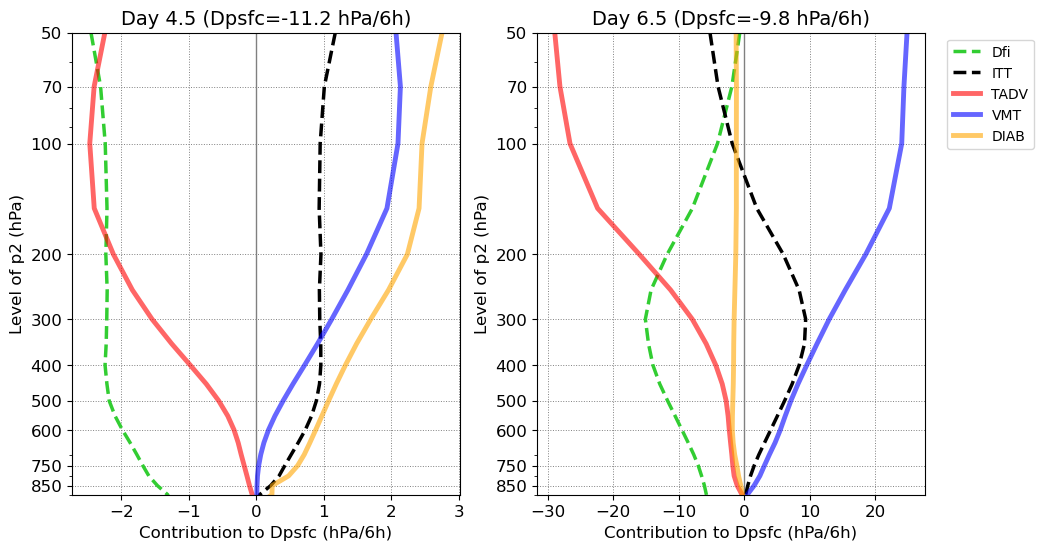

In [7]:
# Plot absolute values for the target simulation
tarnexp= 1 #start from 1
print('Target experiment:',expname[tarnexp]) #the "frist" experiment (CTL) is stored with dfi[0,time,level]

colors={1:'k',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
fs=12

plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(11, 6))
ax1 = plt.subplot(1,2,1)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
for t in [7]:
#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
    aa =1
    aa2 = 0.6
    ls ="solid"
    lsd = "dashed"
   
    plt.plot(dfi[tarnexp-1, t,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="dfi") 
    plt.plot(itt[tarnexp-1,t,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="itt") 
    plt.plot(tadv[tarnexp-1,t,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="tadv") 
    plt.plot(vmt[tarnexp-1,t,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="vmt")
    plt.plot(diab[tarnexp-1,t,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="diab") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Day 4.5 (Dpsfc=-11.2 hPa/6h)', fontsize=14) #CTL
#plt.title('Day 4.5 (Dpsfc=-10.3 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 4.5 (Dpsfc=-8.8 hPa/6h)', fontsize=14) #Tanom


ax1 = plt.subplot(1,2,2)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
for t in [22]:
#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
    aa =1
    aa2 = 0.6
    ls = "solid"
    lsd = "dashed"
   
    plt.plot(dfi[tarnexp-1,t,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="Dfi") 
    plt.plot(itt[tarnexp-1,t,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="ITT") 
    plt.plot(tadv[tarnexp-1,t,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="TADV") 
    plt.plot(vmt[tarnexp-1,t,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="VMT")
    plt.plot(diab[tarnexp-1,t,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="DIAB") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Day 6.5 (Dpsfc=-9.8 hPa/6h)', fontsize=14) #  CTL
#plt.title('Day 6.5 (Dpsfc=-11.5 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 6.5 (Dpsfc=-13.4 hPa/6h)', fontsize=14) #  Tanom
#plt.title('Deepening rate of the cyclone center (Semi-Lagragian)', fontsize=14)
#plt.savefig('p2dependency_'+exp+'.png', bbox_inches='tight', dpi=100)
plt.show()
plt.close()

Target experiment: CTL


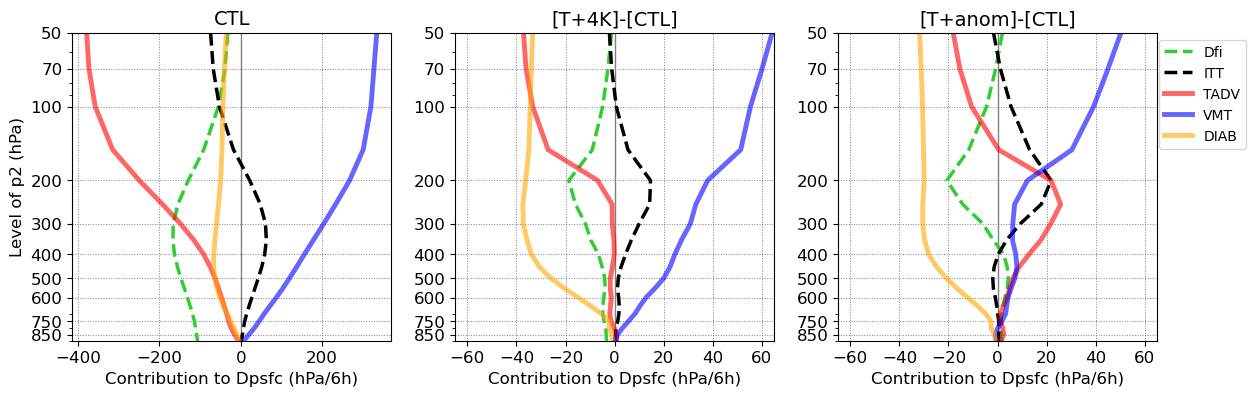

In [8]:
# Plot absolute values for the target simulation
tarnexp= 1 #start from 1
print('Target experiment:',expname[tarnexp]) #the "frist" experiment (CTL) is stored with dfi[0,time,level]

colors={1:'k',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
fs=12

plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1,3,1)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
for t in [26]:
#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
    aa =1
    aa2 = 0.6
    ls ="solid"
    lsd = "dashed"
   
    plt.plot(accdfi[tarnexp-1, t,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="dfi") 
    plt.plot(accitt[tarnexp-1,t,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="itt") 
    plt.plot(acctadv[tarnexp-1,t,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="tadv") 
    plt.plot(accvmt[tarnexp-1,t,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="vmt")
    plt.plot(accdiab[tarnexp-1,t,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="diab") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('CTL', fontsize=14) #CTL
#plt.title('Day 4.5 (Dpsfc=-10.3 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 4.5 (Dpsfc=-8.8 hPa/6h)', fontsize=14) #Tanom


ax1 = plt.subplot(1,3,2)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
for t in [26]:
#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
    aa =1
    aa2 = 0.6
    ls = "solid"
    lsd = "dashed"
   
    plt.plot(accdfi[1,t,:]-accdfi[0,t,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="Dfi") 
    plt.plot(accitt[1,t,:]-accitt[0,t,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="ITT") 
    plt.plot(acctadv[1,t,:]-acctadv[0,t,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="TADV") 
    plt.plot(accvmt[1,t,:]-accvmt[0,t,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="VMT")
    plt.plot(accdiab[1,t,:]-accdiab[0,t,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="DIAB") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-65,65)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
#plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('[T+4K]-[CTL]', fontsize=14) #  CTL

ax1 = plt.subplot(1,3,3)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
for t in [26]:
#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
    aa =1
    aa2 = 0.6
    ls = "solid"
    lsd = "dashed"
   
    plt.plot(accdfi[3,t,:]-accdfi[0,t,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="Dfi") 
    plt.plot(accitt[3,t,:]-accitt[0,t,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="ITT") 
    plt.plot(acctadv[3,t,:]-acctadv[0,t,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="TADV") 
    plt.plot(accvmt[3,t,:]-accvmt[0,t,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="VMT")
    plt.plot(accdiab[3,t,:]-accdiab[0,t,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="DIAB") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-65,65)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)#
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('[T+anom]-[CTL]', fontsize=14) #  CTL
#plt.title('Day 6.5 (Dpsfc=-11.5 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 6.5 (Dpsfc=-13.4 hPa/6h)', fontsize=14) #  Tanom
#plt.title('Deepening rate of the cyclone center (Semi-Lagragian)', fontsize=14)
#plt.savefig('p2dependency_'+exp+'.png', bbox_inches='tight', dpi=100)

plt.show()
plt.close()

Target experiment: CTL


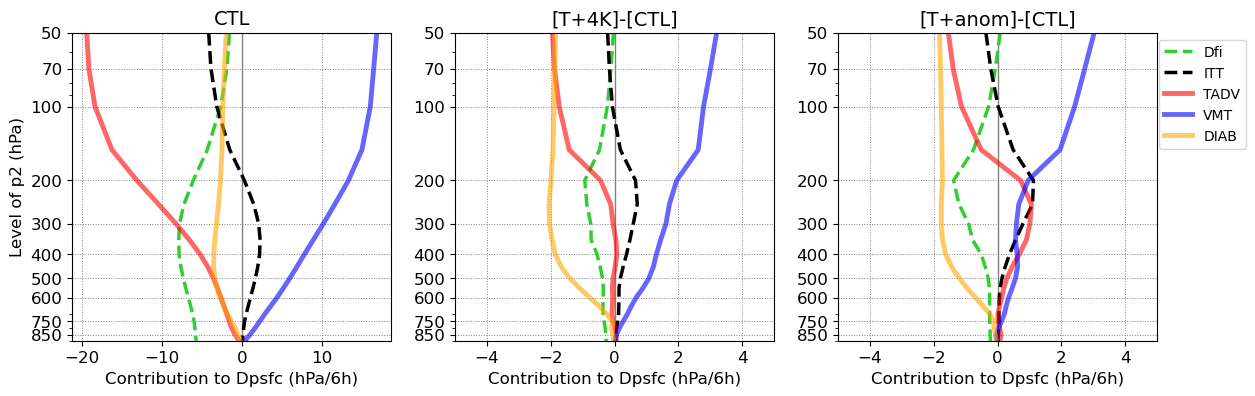

In [9]:
# Plot absolute values for the target simulation
tarnexp= 1 #start from 1
print('Target experiment:',expname[tarnexp]) #the "frist" experiment (CTL) is stored with dfi[0,time,level]

colors={1:'k',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
fs=12

plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1,3,1)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0

#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
aa =1
aa2 = 0.6
ls ="solid"
lsd = "dashed"
   
plt.plot(avgdfi[tarnexp-1,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="dfi") 
plt.plot(avgitt[tarnexp-1,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="itt") 
plt.plot(avgtadv[tarnexp-1,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="tadv") 
plt.plot(avgvmt[tarnexp-1,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="vmt")
plt.plot(avgdiab[tarnexp-1,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="diab") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('CTL', fontsize=14) #CTL
#plt.title('Day 4.5 (Dpsfc=-10.3 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 4.5 (Dpsfc=-8.8 hPa/6h)', fontsize=14) #Tanom


ax1 = plt.subplot(1,3,2)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
    
aa =1
aa2 = 0.6
ls = "solid"
lsd = "dashed"
   
plt.plot(avgdfi[1,:]-avgdfi[0,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="Dfi") 
plt.plot(avgitt[1,:]-avgitt[0,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="ITT") 
plt.plot(avgtadv[1,:]-avgtadv[0,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="TADV") 
plt.plot(avgvmt[1,:]-avgvmt[0,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="VMT")
plt.plot(avgdiab[1,:]-avgdiab[0,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="DIAB") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-5,5)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
#plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('[T+4K]-[CTL]', fontsize=14) #  CTL

ax1 = plt.subplot(1,3,3)
#ax1.bar(time,precipsum1,width=0.2,color='cornflowerblue',label='80km',alpha=1)   
count = 0
#for t in [26]:
#for t in range(8,36,4):
    #aa = 0.4+ 0.3*count
    
aa =1
aa2 = 0.6
ls = "solid"
lsd = "dashed"
   
plt.plot(avgdfi[3,:]-avgdfi[0,:],levels[:],color='limegreen',linewidth=2.5,linestyle=lsd, alpha=aa,label="Dfi") 
plt.plot(avgitt[3,:]-avgitt[0,:],levels[:],color='k',linewidth=2.5,linestyle=lsd,alpha=aa,label="ITT") 
plt.plot(avgtadv[3,:]-avgtadv[0,:],levels[:],color='r',linewidth=3.5,linestyle=ls,alpha=aa2,label="TADV") 
plt.plot(avgvmt[3,:]-avgvmt[0,:],levels[:],color='b',linewidth=3.5,linestyle=ls,alpha=aa2,label="VMT")
plt.plot(avgdiab[3,:]-avgdiab[0,:],levels[:],color='orange',linewidth=3.5,linestyle=ls,alpha=aa2,label="DIAB") 

plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-5,5)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)#
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('[T+anom]-[CTL]', fontsize=14) #  CTL
#plt.title('Day 6.5 (Dpsfc=-11.5 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 6.5 (Dpsfc=-13.4 hPa/6h)', fontsize=14) #  Tanom
#plt.title('Deepening rate of the cyclone center (Semi-Lagragian)', fontsize=14)
#plt.savefig('p2dependency_'+exp+'_avg.png', bbox_inches='tight', dpi=100)

plt.show()
plt.close()

Target experiment: CTL


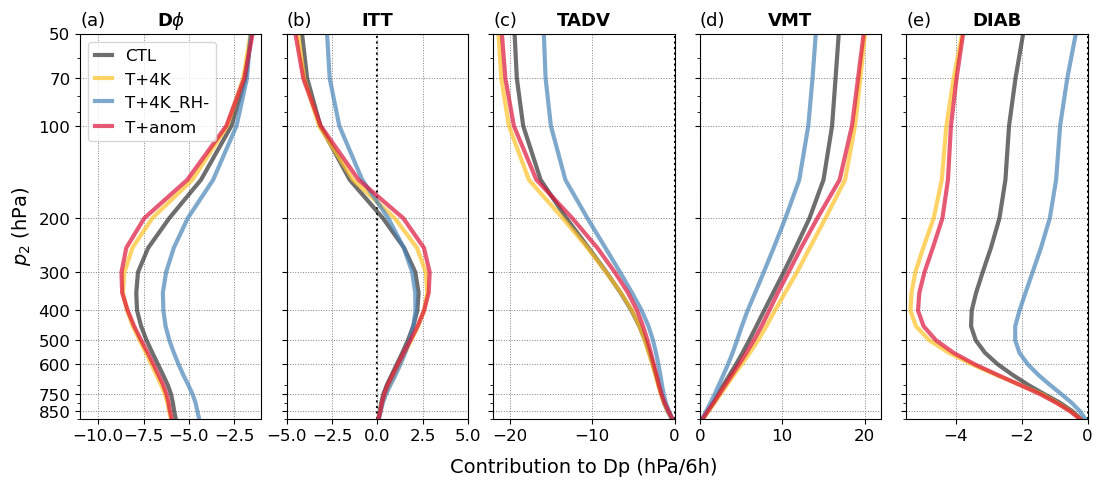

In [17]:
# Plot absolute values for the target simulation
tarnexp= 1 #start from 1
print('Target experiment:',expname[tarnexp]) #the "frist" experiment (CTL) is stored with dfi[0,time,level]

#colors={1:'k',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
fs=12

plt.rcParams['savefig.facecolor']='white'


fig = plt.figure(figsize=(13, 5))
ax1 = plt.subplot(1,5,1)

for i in range(1,5): # loop over simulations
    ax1.plot(avgdfi[i-1,:],levels[:], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.7)
ax1.legend(fontsize=12, loc='upper left',handlelength=1.0)

plt.axvline(x = 0, color = 'k',zorder=0, linewidth=1.5, linestyle=':')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-11,-1)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
plt.ylabel(''r'$p_2$'' (hPa)',fontsize=14)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('D'r'$\phi$', fontsize=13, weight='bold') #CTL
#plt.title('Day 4.5 (Dpsfc=-10.3 hPa/6h)', fontsize=14) #  4K
#plt.title('Day 4.5 (Dpsfc=-8.8 hPa/6h)', fontsize=14) #Tanom
plt.text(0,1.01, '(a)', ha='left', va='bottom',
         transform=ax1.transAxes, fontsize=13, zorder=60) 

ax2 = plt.subplot(1,5,2)
for i in range(1,5): # loop over simulations
    ax2.plot(avgitt[i-1,:],levels[:], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.7)

plt.axvline(x = 0, color = 'k',zorder=0, linewidth=1.5, linestyle=':')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-5,5)
#plt.xlim(-33,33)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [])
#plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
#plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('ITT', fontsize=13, weight='bold') #  CTL
plt.text(0,1.01, '(b)', ha='left', va='bottom',
         transform=ax2.transAxes, fontsize=13, zorder=60) 

ax3 = plt.subplot(1,5,3)
    
for i in range(1,5): # loop over simulations
    ax3.plot(avgtadv[i-1,:],levels[:], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.7)
    
plt.axvline(x = 0, color = 'k',zorder=0, linewidth=1.5, linestyle=':')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-22,0)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [])
#plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)#
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('TADV', fontsize=13, weight='bold') #  CTL
plt.text(0,1.01, '(c)', ha='left', va='bottom',
         transform=ax3.transAxes, fontsize=13, zorder=60) 
#plt.xlabel('Contribution to Dp (hPa/6h)',fontsize=14, y= -1)

label = ax3.set_xlabel('Contribution to Dp (hPa/6h)', fontsize = 14)
ax3.xaxis.set_label_coords(0.5, -0.1)

ax4 = plt.subplot(1,5,4)
for i in range(1,5): # loop over simulations
    ax4.plot(avgvmt[i-1,:],levels[:], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.7)
    
plt.axvline(x = 0, color = 'k',zorder=0, linewidth=1.5, linestyle=':')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(0,22)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [])
#plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)#
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('VMT', fontsize=13, weight='bold') #  CTL
plt.text(0,1.01, '(d)', ha='left', va='bottom',
         transform=ax4.transAxes, fontsize=13, zorder=60) 

ax5 = plt.subplot(1,5,5)
for i in range(1,5): # loop over simulations
    ax5.plot(avgdiab[i-1,:],levels[:], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.7)
plt.axvline(x = 0, color = 'k',zorder=0, linewidth=1.5, linestyle=':')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(900,50)
plt.xlim(-5.5,0)
#plt.yticks(np.arange(950,0,-50)) 
plt.yticks([850,750,600,500,400,300,200,100,70,50], [])
#plt.xlabel('Contribution to Dpsfc (hPa/6h)',fontsize=12)#
#plt.ylabel('Level of p2 (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('DIAB', fontsize=13, weight='bold') #  CTL
plt.text(0,1.01, '(e)', ha='left', va='bottom',
         transform=ax5.transAxes, fontsize=13, zorder=60) 

plt.subplots_adjust(wspace = 0.14)
plt.savefig('Fig8_p2dependency_'+exp+'_avg_day3to7.png', bbox_inches='tight', dpi=100)

plt.show()
plt.close()

Target experiment: T+4K
Target experiment: T+4K_RH-
Target experiment: T+anom


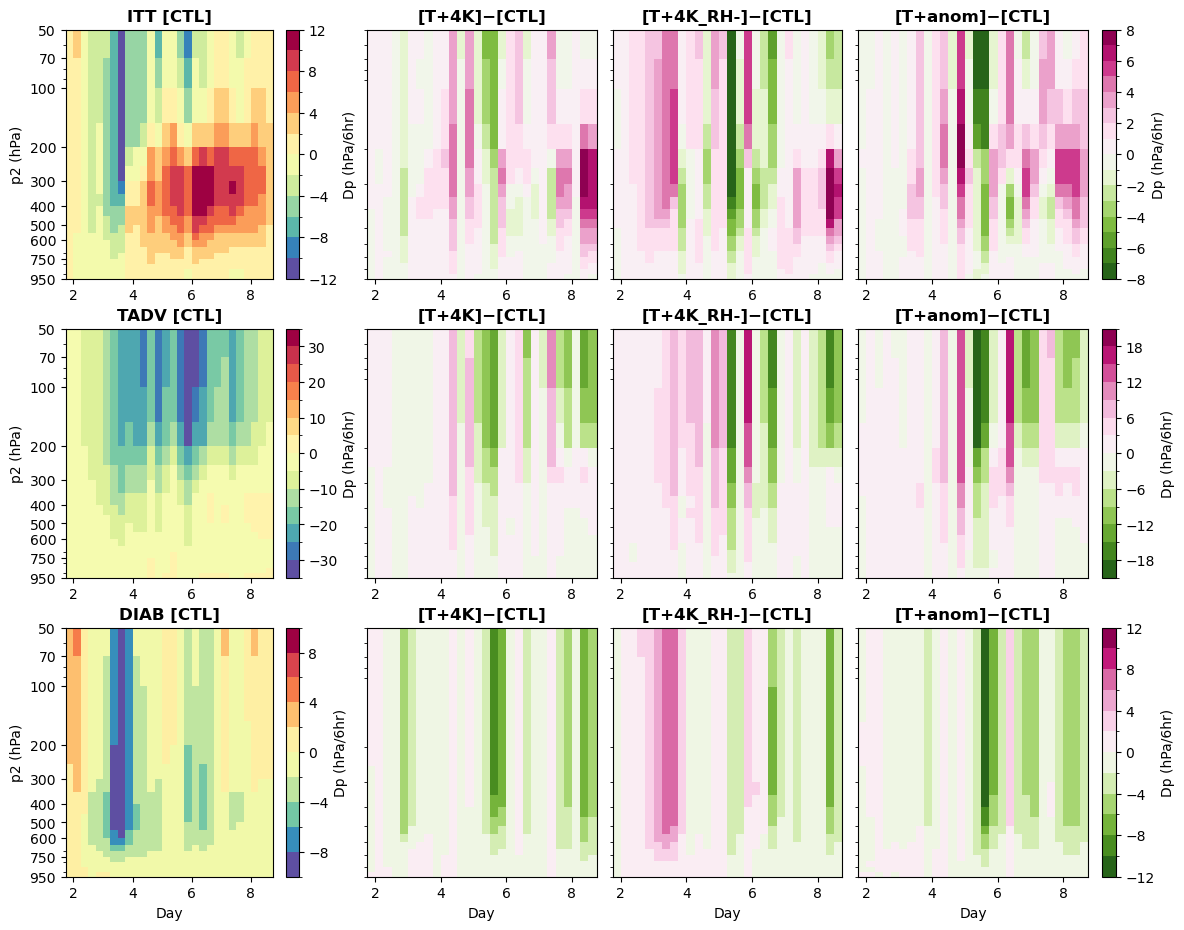

In [11]:
# Plot absolute values for the target simulation
import matplotlib.gridspec as gridspec
plt.rcParams['savefig.facecolor']='white'

colors={1:'k',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
fs=10

fig = plt.figure(figsize=(14, 11))

# create a 1-column container as the left container
gs_left = gridspec.GridSpec(3, 1)

# create a 3-column grid as the mid container
gs_mid = gridspec.GridSpec(3, 3)

# create a 1-column grid as the right container
gs_right = gridspec.GridSpec(3, 1)

ax1 = fig.add_subplot(gs_left[0,0])

#----------------CTL----------------
#-----------------------------------
cmap = plt.get_cmap('Spectral_r')
clevs= np.arange(-12,14,2)
norm = BoundaryNorm(clevs, ncolors=cmap.N, clip=True)

#ax1 = plt.subplot(3,4,1)

citt0 = itt[0,:-1, :-1]

im = ax1.pcolormesh(time2d, level2d, citt0, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax1,label='Dp (hPa/6hr)')
ax1.set_title('ITT [CTL]',fontweight='bold')

#plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('p2 (hPa)',fontsize=fs)

plt.ylim(900,50)
plt.xlim(1.75,8.75)
plt.yticks([950,750,600,500,400,300,200,100,70,50], [950,750,600,500,400,300,200,100,70,50])

#-----------------------------------
ax2 = fig.add_subplot(gs_left[1,0])

clevs= np.arange(-35,40,5)
norm = BoundaryNorm(clevs, ncolors=cmap.N, clip=True)

#ax1 = plt.subplot(3,4,5)

ctadv0 = tadv[0,:-1, :-1]

im = ax2.pcolormesh(time2d, level2d, ctadv0, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax2,label='Dp (hPa/6hr)')
ax2.set_title('TADV [CTL]',fontweight='bold')

#plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('p2 (hPa)',fontsize=fs)
plt.ylim(900,50)
plt.xlim(1.75,8.75)
#plt.yticks([], [])

plt.yticks([950,750,600,500,400,300,200,100,70,50], [950,750,600,500,400,300,200,100,70,50])

#------------------------------
ax3 = fig.add_subplot(gs_left[2,0])

clevs= np.arange(-10,12,2)
norm = BoundaryNorm(clevs, ncolors=cmap.N, clip=True)

#ax2 = plt.subplot(3,4,9)

cdiab0 = diab[0,:-1, :-1]

im = ax3.pcolormesh(time2d, level2d, cdiab0, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax3,label='Dp (hPa/6hr)')
ax3.set_title('DIAB [CTL]',fontweight='bold')

#plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('p2 (hPa)',fontsize=fs)
plt.xlabel('Day',fontsize=fs)
plt.ylim(900,50)
plt.xlim(1.75,8.75)
#plt.yticks([], [])

plt.yticks([950,750,600,500,400,300,200,100,70,50], [950,750,600,500,400,300,200,100,70,50])

#----------------DIFF----------------

#-----------------------------------
cmap = plt.get_cmap('PiYG_r')
clevs= np.arange(-8,9,1)
norm = BoundaryNorm(clevs, ncolors=cmap.N, clip=True)


for eno in [2,3,4]: 
    print('Target experiment:',expname[eno]) #the "frist" experiment (CTL) is stored with dfi[0,time,level]

    ax1 = fig.add_subplot(gs_mid[0,eno-2])
    itt0 = itt[eno-1, :-1, :-1]

    im1 = ax1.pcolormesh(time2d, level2d, itt0-citt0, cmap=cmap, norm=norm)
    #if eno == 4:
    #fig.colorbar(im1, ax=ax1)
    ax1.set_title('['+expname[eno]+']\N{MINUS SIGN}[CTL]',fontweight='bold')

    #plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
    plt.gca().invert_yaxis()
    plt.yscale('log')
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    #plt.ylabel('hPa',fontsize=fs) 
    plt.ylim(900,50)
    plt.xlim(1.75,8.75)
    #plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
    plt.yticks([], [])
#-----------------------------------
clevs= np.arange(-21,24,3)
norm = BoundaryNorm(clevs, ncolors=cmap.N, clip=True)

for eno in [2,3,4]: 
    #ax1 = plt.subplot(3,4,4+eno)
    ax2 = fig.add_subplot(gs_mid[1,eno-2])
    tadv0 = tadv[eno-1, :-1, :-1]
    
    im2 = ax2.pcolormesh(time2d, level2d, tadv0-ctadv0, cmap=cmap, norm=norm)
    #if eno == 4:
    #fig.colorbar(im2, ax=ax2)
    ax2.set_title('['+expname[eno]+']\N{MINUS SIGN}[CTL]',fontweight='bold')

    #plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
    plt.gca().invert_yaxis()
    plt.yscale('log')
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.ylim(900,50)
    plt.xlim(1.75,8.75)
    plt.yticks([], [])

    #plt.yticks([850,750,600,500,400,300,200,100,70,50], [850,750,600,500,400,300,200,100,70,50])
    
#------------------------------
clevs= np.arange(-12,14,2)
norm = BoundaryNorm(clevs, ncolors=cmap.N, clip=True)

for eno in [2,3,4]: 
    #ax2 = plt.subplot(3,4,8+eno)
    ax3 = fig.add_subplot(gs_mid[2,eno-2])
    diab0 = diab[eno-1, :-1, :-1]

    im3 = ax3.pcolormesh(time2d, level2d, diab0-cdiab0, cmap=cmap, norm=norm)
    #if eno == 4:
    #fig.colorbar(im3, ax=ax3)
    ax3.set_title('['+expname[eno]+']\N{MINUS SIGN}[CTL]',fontweight='bold')

    #plt.axvline(x = 0, color = 'gray',zorder=0, linewidth=1)
    plt.gca().invert_yaxis()
    plt.yscale('log')
    plt.xlabel('Day',fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.ylim(900,50)
    plt.xlim(1.75,8.75)
    plt.yticks([], [])

# now the plots are on top of each other, we'll have to adjust their edges so that they won't overlap
gs_left.update(right=0.31)
gs_mid.update(left=0.34, right=0.855)
#cbar_ax = fig.add_axes([0.22, 0.01, 0.6, 0.02]) # left,bottom,width,height
#cb = fig.colorbar(cd, cax=cbar_ax, orientation='horizontal', extend='max')

axc1 = fig.add_subplot(gs_right[0,0])
cbar1= fig.colorbar(im1, cax=axc1, orientation='vertical',label='Dp (hPa/6hr)')
#cbar1.ax.yaxis.set_ticks_position('left')
#cbar1.ax.yaxis.set_label_position('left')
#axc1p = axc1.twinx()
#axc1p.set_ylim(0,100)
#axc1p.set_ylabel('relative to mean values')

axc2 = fig.add_subplot(gs_right[1,0])
fig.colorbar(im2, cax=axc2, orientation='vertical',label='Dp (hPa/6hr)')
axc3 = fig.add_subplot(gs_right[2,0])
fig.colorbar(im3, cax=axc3, orientation='vertical',label='Dp (hPa/6hr)')

gs_right.update(left=0.865,right=0.875)

# also, we want to get rid of the horizontal spacing in the left gridspec
gs_mid.update(wspace=0.07)

fig.subplots_adjust(wspace = 0.07, hspace = 0.2)


#plt.savefig('p2_vs_time_ITT_TADV_DIAB_all4exp_'+res+'.png', bbox_inches='tight', dpi=100)
plt.show()
plt.close()